<a href="https://colab.research.google.com/github/mgresnik/trabajo_practico_nro_1/blob/main/Laboratorio_de_datos_(LCD)_IC_2024_Trabajo_Pr%C3%A1ctico_N%C2%B0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####Universidad de Buenos Aires >> Facultad de Ciencias Exactas y Naturales >> Ciencias de Datos
#####Laboratorio de Datos - Primer Cuatrimestre 2024
# **Trabajo Práctico N° 1**
##**Turno noche - Grupo 2**
**Integrantes:**
*   César Alejandro Momberg
*   Matías Gabriel Resnik

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from datetime import date
import pandas as pd
import numpy as np
import seaborn.objects as so

In [ ]:
# Carga de los archivos
df_sube = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sube-2023.csv")

In [ ]:
df_sube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472291 entries, 0 to 472290
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   DIA_TRANSPORTE   472291 non-null  object
 1   NOMBRE_EMPRESA   472291 non-null  object
 2   LINEA            472291 non-null  object
 3   AMBA             472291 non-null  object
 4   TIPO_TRANSPORTE  472291 non-null  object
 5   JURISDICCION     469742 non-null  object
 6   PROVINCIA        469720 non-null  object
 7   MUNICIPIO        469720 non-null  object
 8   CANTIDAD         472291 non-null  int64 
 9   DATO_PRELIMINAR  472291 non-null  object
dtypes: int64(1), object(9)
memory usage: 36.0+ MB


**Observación:** Hay columas que tienen datos NaN ¿qué hacemos? ¿eliminamos las filas? ¿las dejamos? ¿esas columnas tienen datos relevantes (JURISDICCION, PROVINCIA, MUNICIPIO)?

##**Procesamiento de Datos**
1. (a) Visualizar el tipo de datos de cada columna. Transformar la columna DIA_TRANSPORTE para que sea reconocida como una fecha.


In [ ]:
df_sube['DIA_TRANSPORTE'] = pd.to_datetime(df_sube['DIA_TRANSPORTE'], format='%Y-%m-%d')
print("\nDIA_TRANSPORTE ahora es de tipo", df_sube['DIA_TRANSPORTE'].dtype)


DIA_TRANSPORTE ahora es de tipo datetime64[ns]


1. (b) Agregar tres columnas al DataFrame:

i.   FECHA_DIA: Debe indicar el nombre del día de la semana correspondiente a
DIA_TRANSPORTE.

ii.  FECHA_ORDINAL: Debe indicar el ordinal correspondiente a DIA_TRANSPORTE (por ejemplo, a 2023-01-01 le corresponde 1, a 2023-01-02 le corresponde 2 y así sucesivamente). Debe ser un entero (int).

iii. FECHA_MES: Debe indicar el mes correspondiente a DIA_TRANSPORTE.


Sugerencia: investigar el método apply de DataFrame.

In [ ]:
def dia_sem(d):
  dias = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
  return dias[d]

df_sube['FECHA_DIA'] = df_sube['DIA_TRANSPORTE'].apply(lambda x: dia_sem(x.weekday())) #Nombre del día de la semana a partir del número de día, empezando en 0 = Lunes
df_sube['FECHA_ORDINAL'] = df_sube['DIA_TRANSPORTE'].apply(lambda y: y.dayofyear) #dia del año
df_sube['FECHA_MES'] = df_sube['DIA_TRANSPORTE'].apply(lambda z: z.month) #mes del año



2. Crear el DataFrame datos_amba, el cual sólo debe tener datos de AMBA y debe excluir datos
preliminares. Además, al ejecutar datos_amba.head() debe observarse el siguiente orden y
formato de columnas:
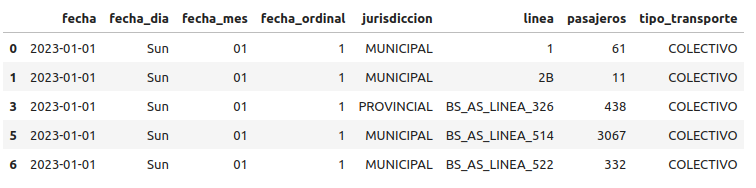

In [ ]:
#Me quedo con los datos de amba y elimino las filas con datos preliminares
df_sube_amba = df_sube[(df_sube.AMBA == "SI") & (df_sube.DATO_PRELIMINAR == "NO")]

#Tomo las columnas que necesito
datos_amba = df_sube_amba[['DIA_TRANSPORTE','FECHA_DIA', 'FECHA_MES','FECHA_ORDINAL','JURISDICCION', 'LINEA', 'CANTIDAD', 'TIPO_TRANSPORTE']]

#Cambio los nombres de las columnas
datos_amba.columns = ['fecha', 'fecha_dia', 'fecha_mes', 'fecha_ordinal', 'jurisdiccion', 'linea', 'pasajeros', 'tipo_transporte']

#Convierto la fecha del mes en string de 2 dígitos
datos_amba.loc[:, 'fecha_mes'] = datos_amba['fecha_mes'].astype(str).str.zfill(2)

#Muestro la información
datos_amba.head()

,fecha,fecha_dia,fecha_mes,fecha_ordinal,jurisdiccion,linea,pasajeros,tipo_transporte
0,2023-01-01,Domingo,01,1,MUNICIPAL,1,61,COLECTIVO
1,2023-01-01,Domingo,01,1,MUNICIPAL,2B,11,COLECTIVO
3,2023-01-01,Domingo,01,1,PROVINCIAL,BS_AS_LINEA_326,438,COLECTIVO
5,2023-01-01,Domingo,01,1,MUNICIPAL,BS_AS_LINEA_514,3067,COLECTIVO
6,2023-01-01,Domingo,01,1,MUNICIPAL,BS_AS_LINEA_522,332,COLECTIVO


3. Utilizando datos_amba, identificar:

(a) la proporción de la cantidad total anual de pasajeros que le corresponde a cada medio de transporte

(b) la tupla (mes, línea de subte) donde viajó la mayor cantidad de pasajeros

(c) el día hábil con menor desvío estándar en cantidad de pasajeros

In [ ]:
#verifico rango de fecha en la base
print("Rango de fechas en datos_base: {} a {}".format(datos_amba.fecha.min().strftime("%Y-%m"),datos_amba.fecha.max().strftime("%Y-%m")))

Rango de fechas en datos_base: 2023-01 a 2023-12


In [ ]:
#al existir sólo un año, la proporción pedida es
total_pasajeros = datos_amba.pasajeros.sum()
proporcion_transporte = datos_amba.groupby('tipo_transporte')['pasajeros'].sum() / total_pasajeros * 100

#mostrando los datos, a 2 decimales, redondeando
for tipo_transporte, porcentaje in proporcion_transporte.items():
    porcentaje_redondeado = round(porcentaje, 3)
    print("{}: {:.2f}%".format(tipo_transporte, porcentaje_redondeado))


COLECTIVO: 83.76%
SUBTE: 6.81%
TREN: 9.43%


In [ ]:

#Filtro por medio de transporte Subte
datos_amba_subte = datos_amba[datos_amba.tipo_transporte == "SUBTE"]

#Agrupo por fecha_es y línea, sumando los pasajeros
agrupado_1 = datos_amba_subte.groupby(["fecha_mes","linea"])['pasajeros'].sum()

# idmax() devuelve el índice de la agrupación, para el valor máximo, en este caso mes '08', línea B
id_max_pasajeros = agrupado_1.idxmax()
id_max_pasajeros

('08', 'LINEA_B')

In [ ]:
#Filtro por día hábil
dias_habiles= ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes"]
datos_amba_habil = datos_amba[datos_amba.fecha_dia.isin(dias_habiles)]

#Agrupo por día y calculo el desvío estandar
agrupado_2 = datos_amba_habil.groupby('fecha_dia')['pasajeros'].std()

# idmin() devuelve el índice de la agrupación, para el valor mínimo, en este caso dia lunes
id_min_std_pasajeros = agrupado_2.idxmin()
id_min_std_pasajeros

'Lunes'

##**Análisis exploratorio**

¿Cómo varía el uso del transporte público a lo largo del año?


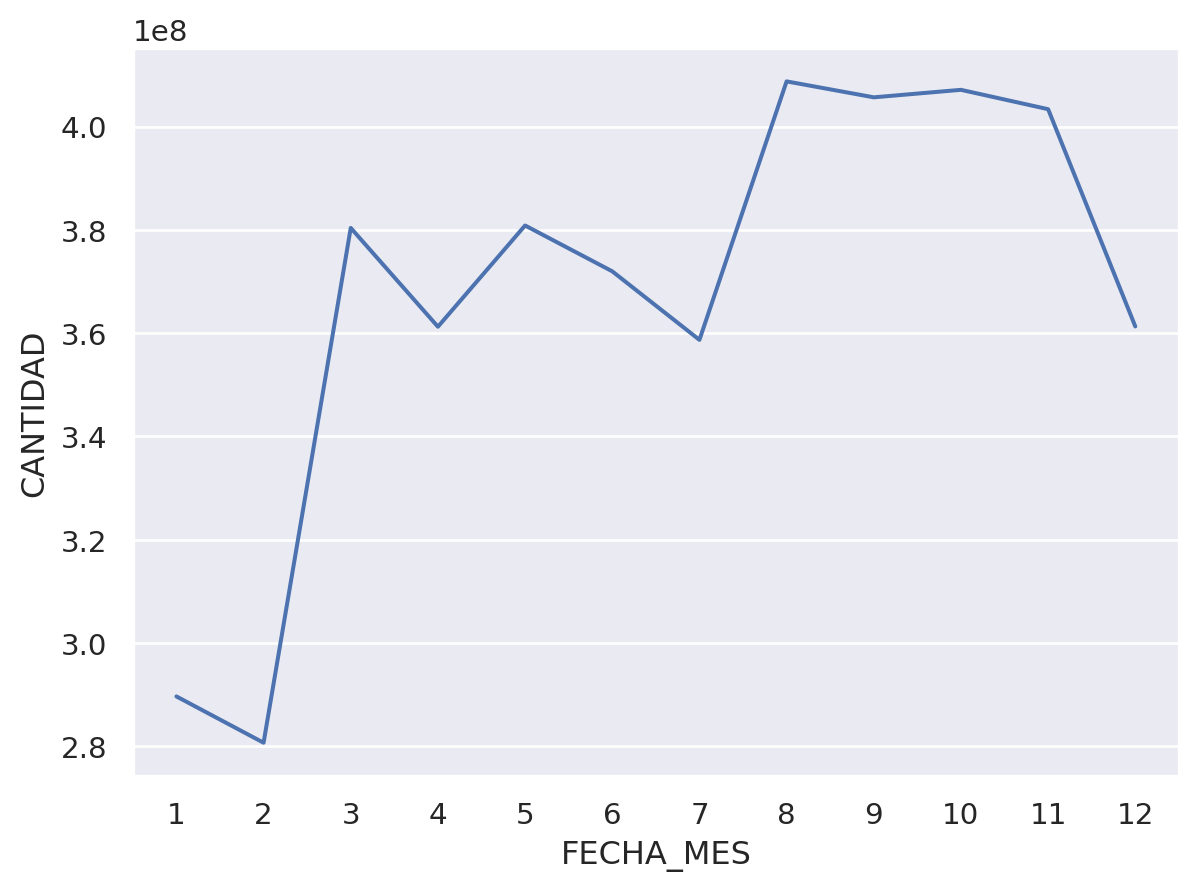

In [ ]:
variacion_anual=df_sube.groupby(['FECHA_MES'])['CANTIDAD'].sum().reset_index()
(
so.Plot(data=variacion_anual,
        x='FECHA_MES',
        y='CANTIDAD')
.add(so.Line())
.scale(x=so.Nominal())
)

¿Se observa el mismo efecto en AMBA y en el interior del país?

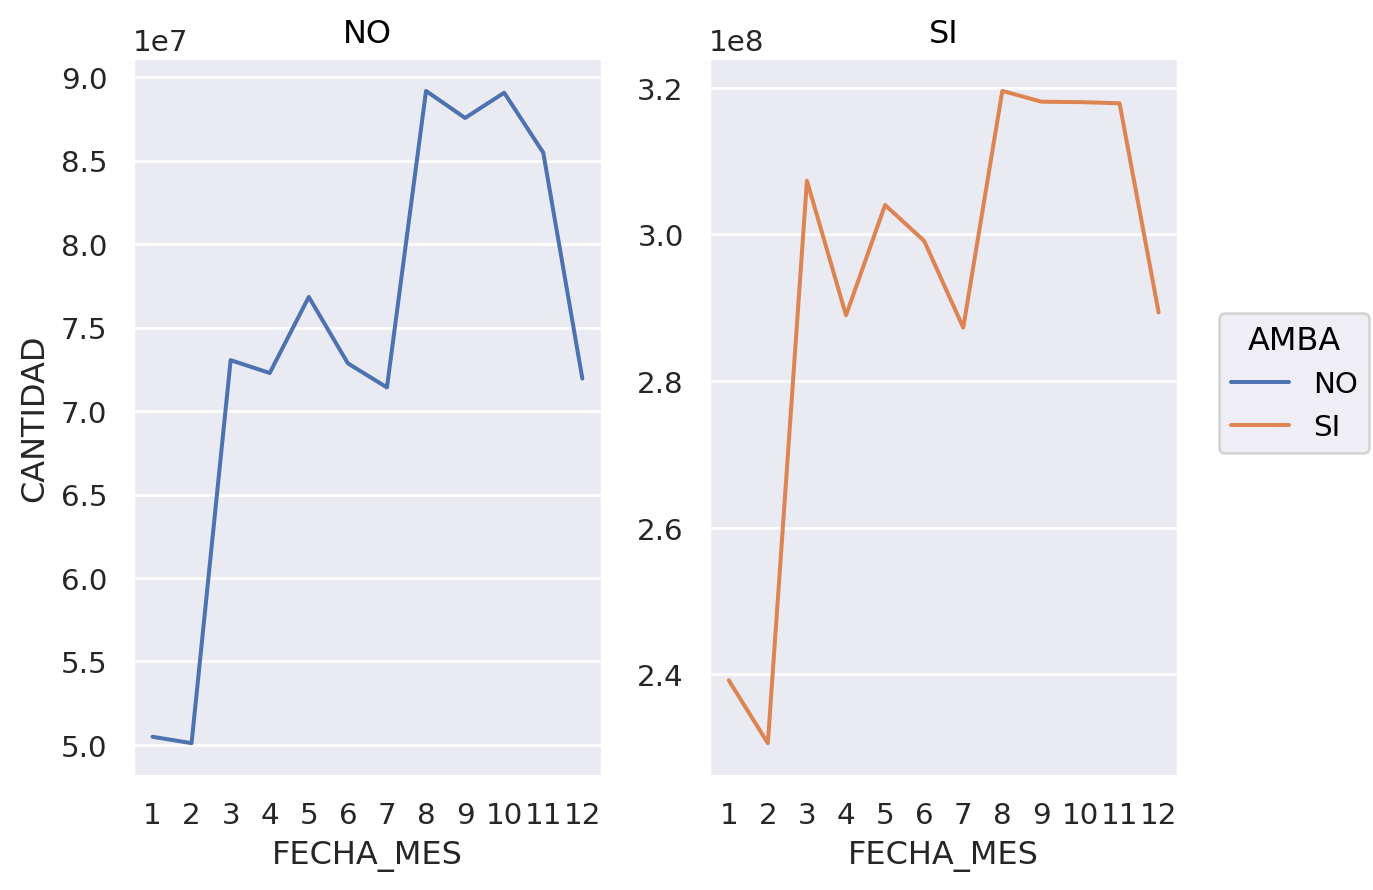

In [ ]:
variacion_anual=df_sube.groupby(['FECHA_MES','AMBA'])['CANTIDAD'].sum().reset_index()
(
so.Plot(data=variacion_anual,
        x='FECHA_MES',
        y='CANTIDAD')
.add(so.Line(), color='AMBA')
.facet('AMBA').share(y=False)
.scale(x=so.Nominal())
)

In [ ]:
variacion_anual=df_sube.groupby(['FECHA_MES','AMBA'])['CANTIDAD'].sum()
variacion_anual

¿Y en todos los medios de transporte por igual?

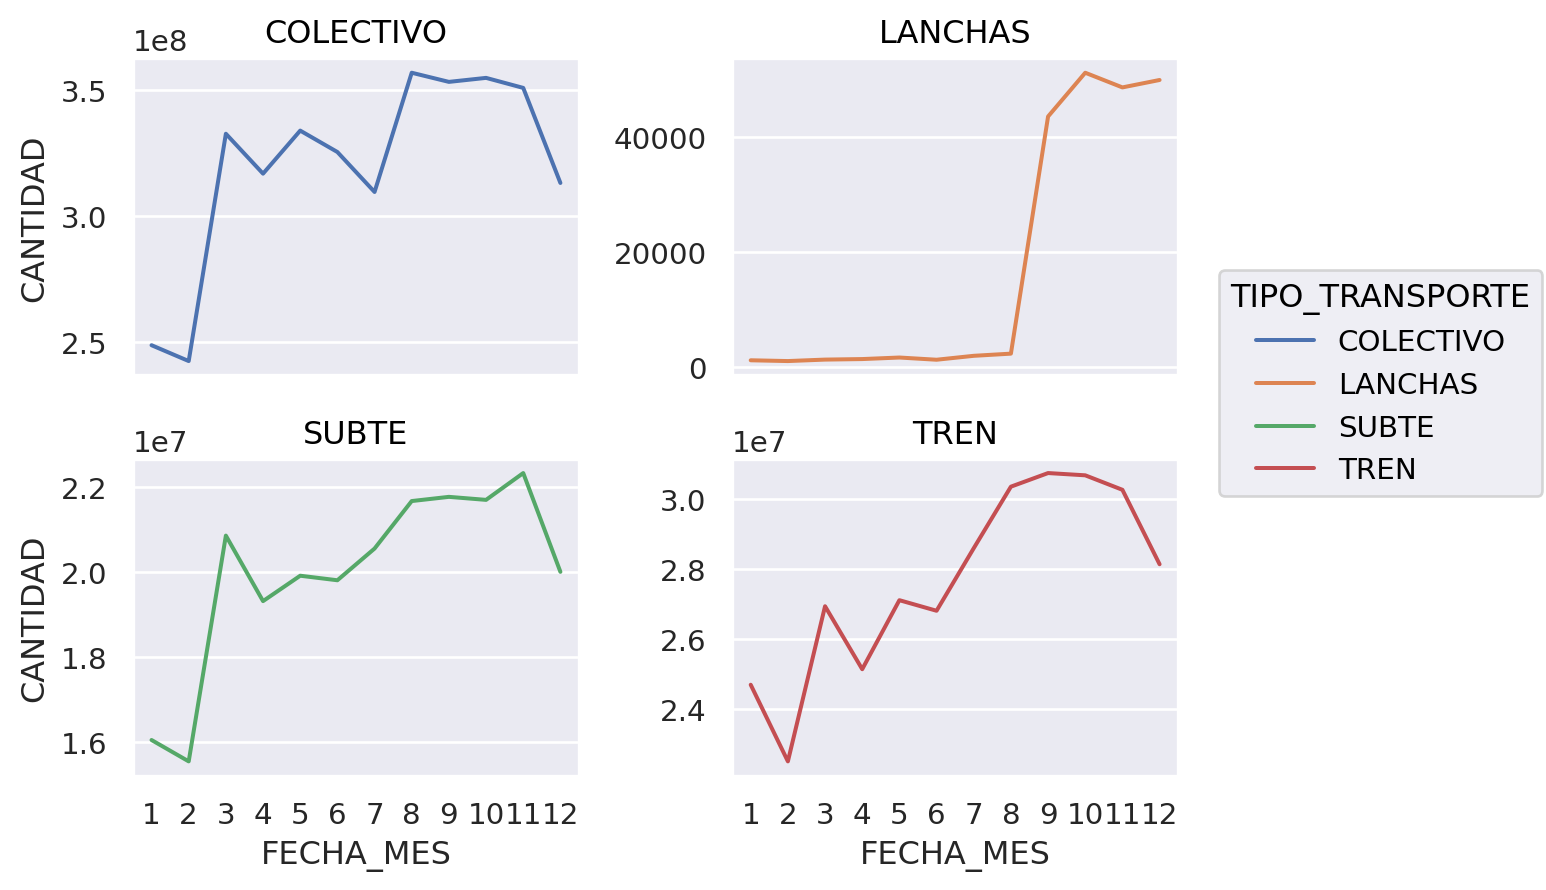

In [ ]:
variacion_anual=df_sube.groupby(['FECHA_MES','TIPO_TRANSPORTE'])['CANTIDAD'].sum().reset_index()
(
so.Plot(data=variacion_anual,
        x='FECHA_MES',
        y='CANTIDAD')
.add(so.Line(),color='TIPO_TRANSPORTE')
.facet('TIPO_TRANSPORTE', wrap=2).share(y=False)
.scale(x=so.Nominal())
)


¿Cómo difiere el uso del transporte público durante los días hábiles en comparación a los fines de semana?

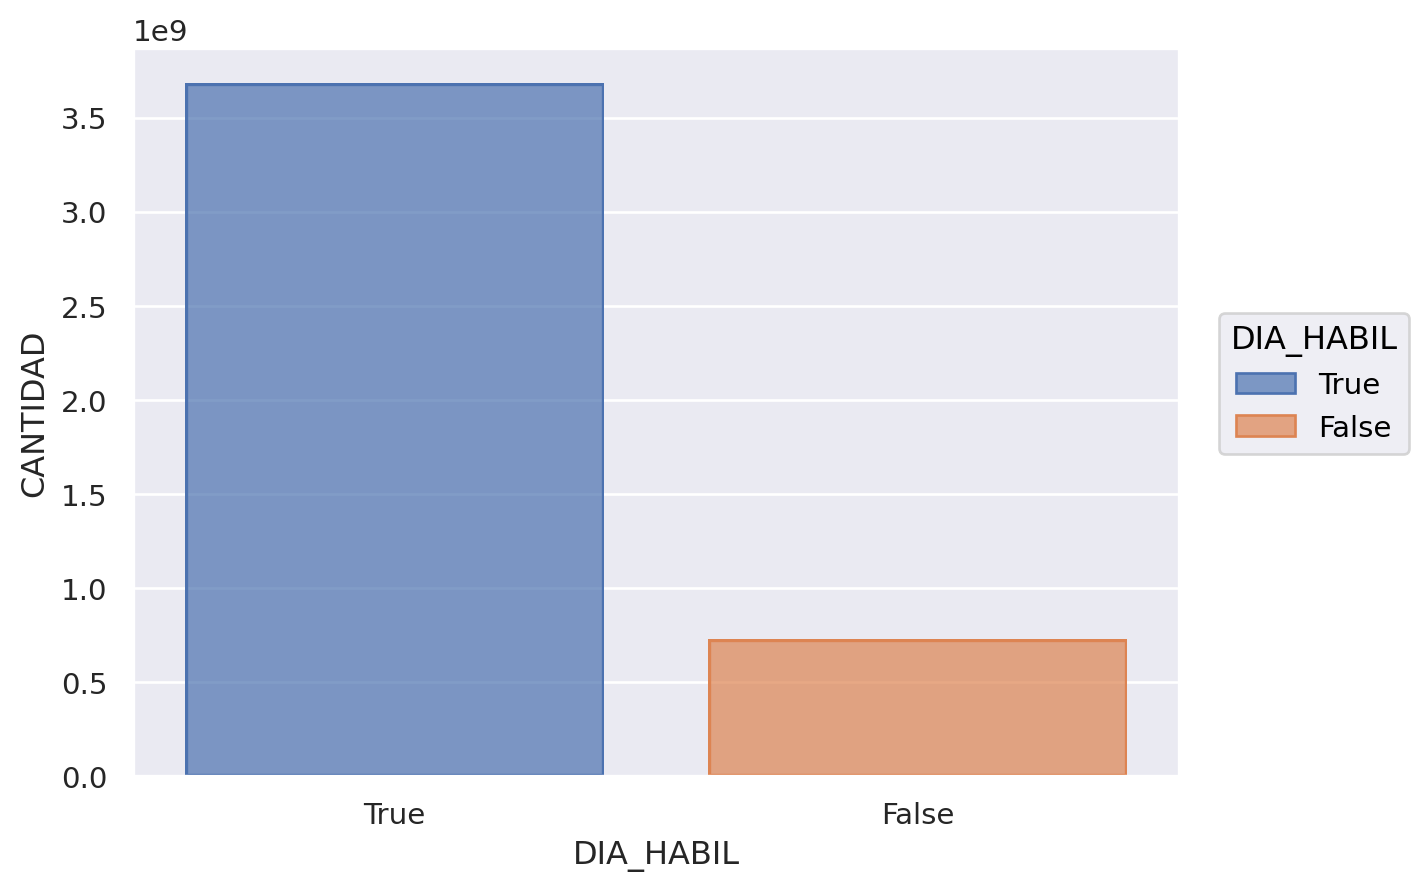

In [ ]:
df_sube['DIA_HABIL']= df_sube['FECHA_DIA'].isin(dias_habiles)
uso_transporte=df_sube.groupby(['DIA_HABIL'])['CANTIDAD'].sum().reset_index()
(
    so.Plot(data=uso_transporte, x='DIA_HABIL',y='CANTIDAD',color='DIA_HABIL')
    .add(so.Bar())
)


¿Hay algún día hábil que resulte un outlier? ¿Pueden explicarlo?

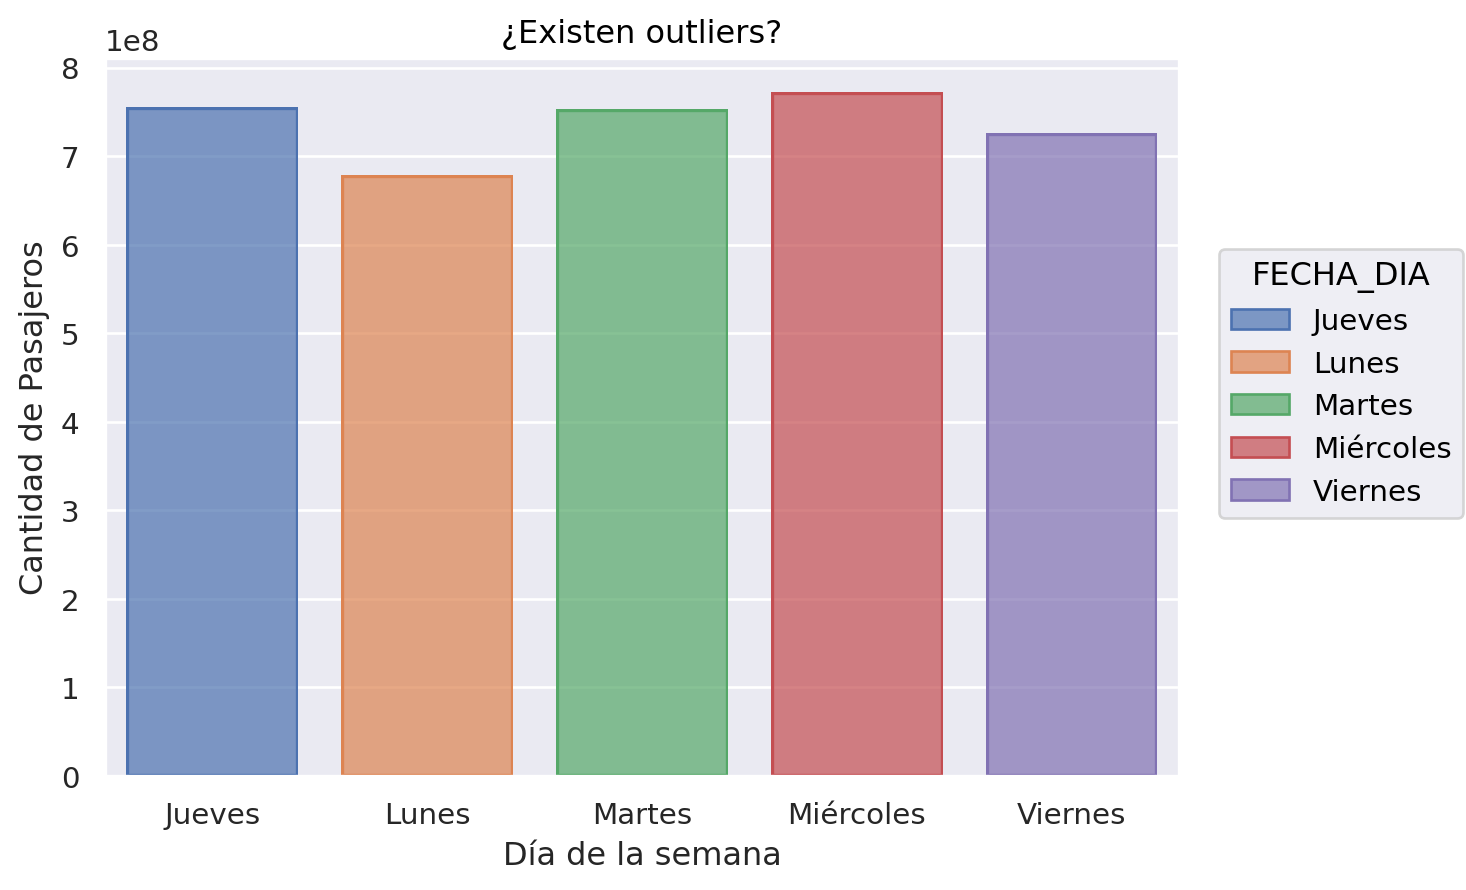

In [ ]:
df_sube['DIA_HABIL']=df_sube['FECHA_DIA'].isin(dias_habiles)
uso_transporte=df_sube.groupby(['FECHA_DIA','DIA_HABIL'])['CANTIDAD'].sum().reset_index()
uso_transporte=uso_transporte[uso_transporte['DIA_HABIL']]
p=(
    so.Plot(data=uso_transporte, x='FECHA_DIA',y='CANTIDAD')
    .add(so.Bar(),color='FECHA_DIA')
)
p.label(y='Cantidad de Pasajeros',x='Día de la semana',title='¿Existen outliers?')

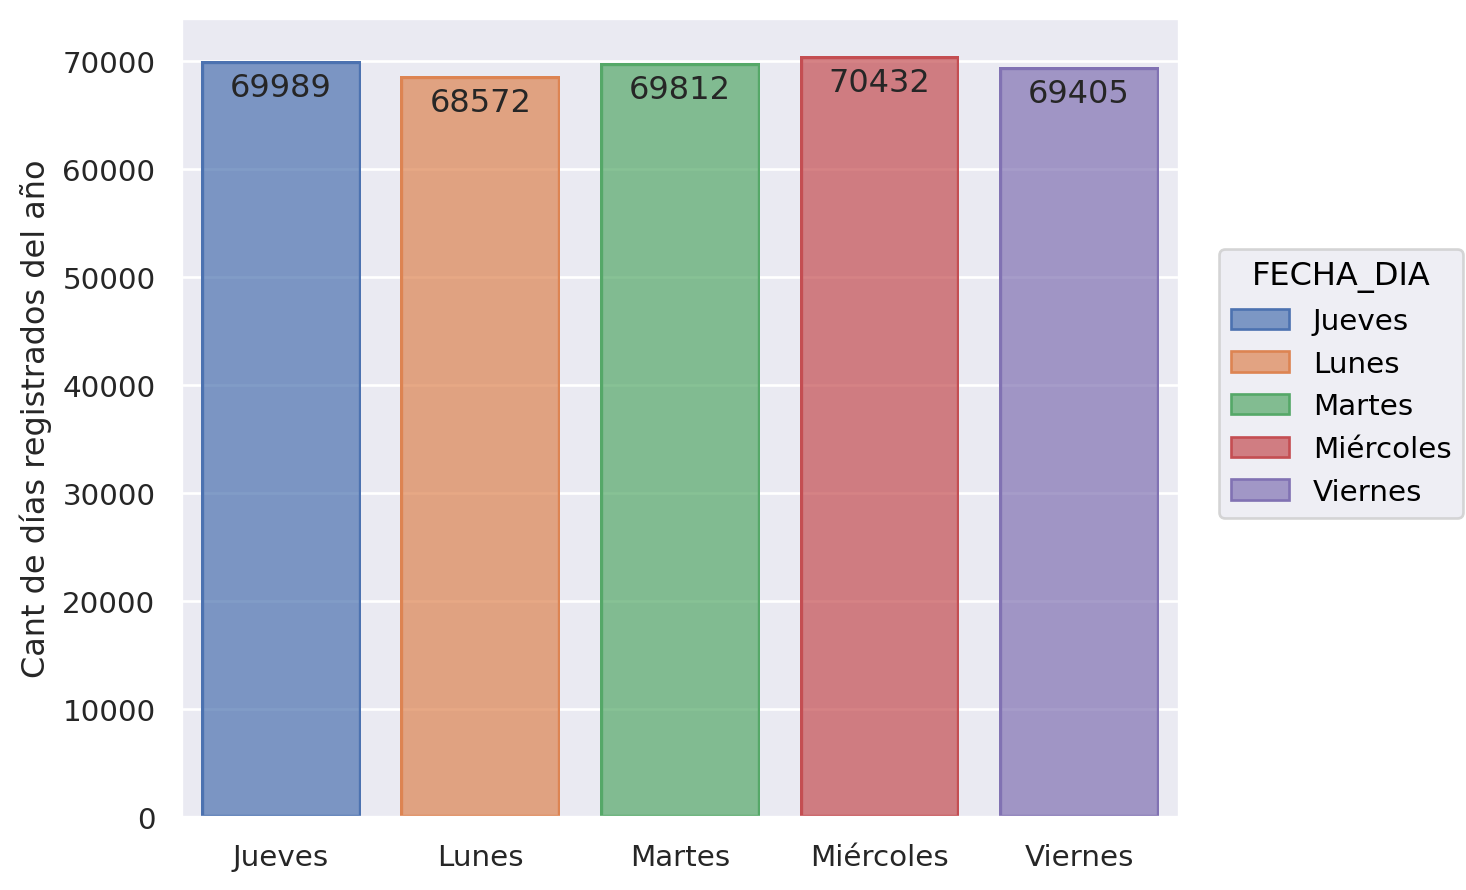

In [ ]:
df_sube['DIA_HABIL']=df_sube['FECHA_DIA'].isin(dias_habiles)
uso_transporte=df_sube.groupby(['FECHA_DIA','DIA_HABIL'])['CANTIDAD'].count().reset_index()
uso_transporte=uso_transporte[uso_transporte['DIA_HABIL']]
p=(
    so.Plot(data=uso_transporte, x='FECHA_DIA',y='CANTIDAD', text='CANTIDAD')
    .add(so.Bar(),color='FECHA_DIA')
    .add(so.Text(valign='top'))
)
p.label(y='Cant de días registrados del año',x='')


##Modelado



In [ ]:
# Carga de los archivos
df_sube_regresion = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sube-2023-regresion.csv")
df_sube_regresion


,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO
...,...,...,...,...,...,...,...,...,...,...
323321,2023-12-30,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL A,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,135,NO
323322,2023-12-30,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL B,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,131,NO
323323,2023-12-30,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL C,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,133,NO
323324,2023-12-30,S.A TRANSPORTE CIUDAD DE RIO CUARTO,TRONCAL D,NO,COLECTIVO,MUNICIPAL,CORDOBA,RIO CUARTO,139,NO


(a) Generar un DataFrame en el que las columnas sean las líneas de colectivo (TIPO_TRANSPORTE
== "COLECTIVO") de AMBA de jurisdicción nacional (PROVINCIA == "JN") y las observaciones sean los días del año. Es decir, cada fila del DataFrame corresponde a un día
del año, y en esa fila deben figurar la cantidad de pasajeros que viajaron en cada línea de
colectivo en el día correspondiente.

In [ ]:
datos_ColectivoJN=df_sube_regresion[(df_sube_regresion['TIPO_TRANSPORTE']=='COLECTIVO') & (df_sube_regresion['AMBA']=='SI') & (df_sube_regresion['PROVINCIA']=='JN')]
cols= datos_ColectivoJN['LINEA'].unique()
inds= datos_ColectivoJN['DIA_TRANSPORTE'].unique()

df_lineas= pd.DataFrame(index=inds,columns=cols)
for linea in cols:
  df_lin=datos_ColectivoJN[datos_ColectivoJN['LINEA']==linea][['DIA_TRANSPORTE','CANTIDAD']]
  df_linea=pd.DataFrame(data=df_lin['CANTIDAD'].values, columns=['CANTIDAD'], index=df_lin['DIA_TRANSPORTE'].values)
  df_lineas[linea]=df_linea['CANTIDAD']

df_lineas

,BS_ASLINEA_123,BSAS_LINEA_002,BSAS_LINEA_009,BSAS_LINEA_010,BSAS_LINEA_015,BSAS_LINEA_017,BSAS_LINEA_019,BSAS_LINEA_020,BSAS_LINEA_021,BSAS_LINEA_022,...,LINEA 5,LINEA 50,LINEA 6,LINEA 7,LINEA 76,LINEA 8,LINEA_099,LINEA_119_AMBA,LINEA_164_AMBA,LINEA 119
2023-01-01,1681,5670,5644,5177,9109,7013,1604,2617,11235,2202,...,4832.0,4839,2449,2184,3797,5317,1882,1573.0,3210,NaN
2023-01-02,9440,21759,23284,21176,45269,29962,13921,11934,55611,13823,...,20333.0,16221,10486,12774,17374,23250,10322,7345.0,19362,NaN
2023-01-04,10540,24755,25405,23806,52873,33659,16172,13366,61721,16206,...,23041.0,18448,12193,13949,19860,26294,11981,7925.0,21784,NaN
2023-01-05,10408,25772,26489,24688,53436,35182,16569,12929,62510,16863,...,23928.0,18481,12888,14668,21235,27216,11787,7597.0,22972,NaN
2023-01-06,10530,26021,26458,24167,53163,35212,16459,12955,63528,16846,...,24247.0,19300,12703,14199,23472,27073,11567,7811.0,23411,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,15957,35664,26684,31803,65544,47601,23197,16051,67748,24169,...,NaN,25838,16870,19426,28628,62260,15823,NaN,30177,13488.0
2023-12-23,8844,24236,19188,19964,43408,31986,12357,9859,50972,14347,...,NaN,13817,7896,9332,21468,43152,8991,NaN,16025,9699.0
2023-12-27,12721,29591,24693,29374,60347,41283,19417,14498,60169,22126,...,NaN,21545,13454,14923,25542,51921,11385,NaN,16931,13262.0
2023-12-29,11970,29355,27200,28708,56713,41937,17945,14579,62203,21557,...,NaN,21150,13622,16020,27094,53424,11755,NaN,20705,12590.0


(b) Eliminar las columnas correspondientes a líneas de colectivo que tengan datos faltantes

In [66]:
for linea in df_lineas.columns:
  if True in df_lineas[linea].isna().unique():
    df_lineas=df_lineas.drop(columns=[linea])

df_lineas

,BS_ASLINEA_123,BSAS_LINEA_002,BSAS_LINEA_009,BSAS_LINEA_010,BSAS_LINEA_015,BSAS_LINEA_017,BSAS_LINEA_019,BSAS_LINEA_020,BSAS_LINEA_021,BSAS_LINEA_022,...,LINEA 4,LINEA 42,LINEA 44,LINEA 50,LINEA 6,LINEA 7,LINEA 76,LINEA 8,LINEA_099,LINEA_164_AMBA
2023-01-01,1681,5670,5644,5177,9109,7013,1604,2617,11235,2202,...,2942,4029,4649,4839,2449,2184,3797,5317,1882,3210
2023-01-02,9440,21759,23284,21176,45269,29962,13921,11934,55611,13823,...,15329,19072,20387,16221,10486,12774,17374,23250,10322,19362
2023-01-04,10540,24755,25405,23806,52873,33659,16172,13366,61721,16206,...,17836,21609,23595,18448,12193,13949,19860,26294,11981,21784
2023-01-05,10408,25772,26489,24688,53436,35182,16569,12929,62510,16863,...,18044,21993,23687,18481,12888,14668,21235,27216,11787,22972
2023-01-06,10530,26021,26458,24167,53163,35212,16459,12955,63528,16846,...,18122,22421,23731,19300,12703,14199,23472,27073,11567,23411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,15957,35664,26684,31803,65544,47601,23197,16051,67748,24169,...,22421,30098,29079,25838,16870,19426,28628,62260,15823,30177
2023-12-23,8844,24236,19188,19964,43408,31986,12357,9859,50972,14347,...,14508,17630,19431,13817,7896,9332,21468,43152,8991,16025
2023-12-27,12721,29591,24693,29374,60347,41283,19417,14498,60169,22126,...,19319,25010,26433,21545,13454,14923,25542,51921,11385,16931
2023-12-29,11970,29355,27200,28708,56713,41937,17945,14579,62203,21557,...,18852,24354,26018,21150,13622,16020,27094,53424,11755,20705
